In [11]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [12]:
covidInfo= pd.read_csv("covidInfo.csv",sep=";")

In [13]:
covidInfo

,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection
0,19/09/2020,Andorre,1564,53,1164,3.39,74.42,22.19
1,19/09/2020,Émirats Arabes Unis,83433,403,72790,0.48,87.24,12.27
2,19/09/2020,Afghanistan,38919,1437,32576,3.69,83.70,12.61
3,19/09/2020,Antigua-et-Barbuda,95,3,92,3.16,96.84,0.00
4,19/09/2020,Albanie,12073,353,6831,2.92,56.58,40.50
...,...,...,...,...,...,...,...,...
6195,20/08/2020,Mayotte,3160,39,2964,1.23,93.80,4.97
6196,20/08/2020,Afrique du Sud,599940,12618,497169,2.10,82.87,15.03
6197,20/08/2020,Zambie,10372,274,9126,2.64,87.99,9.37
6198,20/08/2020,Zimbabwe,5745,151,4525,2.63,78.76,18.61


Which countries have the most deaths at the moment ?

In [14]:
covidInfo.groupby("Pays").Deces.sum().sort_values()

Pays
Îles Féroé                       0
St-Vincent / Grenadines          0
Saint Barthélemy                 0
Dominique                        0
Sainte-Lucie                     0
                            ...   
Royaume-Uni                1290739
Mexique                    2060089
Inde                       2166329
Brésil                     3865647
États-Unis                 5796748
Name: Deces, Length: 200, dtype: int64

What are the days with healing rates greater than 60

In [15]:
covidInfo[covidInfo['TauxGuerison'] > 60].sort_values(by="TauxGuerison", ascending=False)

,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection
4508,28/08/2020,Luxembourg,6580,124,7140,1.88,108.51,-10.40
4108,30/08/2020,Luxembourg,6625,124,7140,1.87,107.77,-9.65
3891,31/08/2020,Luxembourg,6625,124,7140,1.87,107.77,-9.65
4291,29/08/2020,Luxembourg,6625,124,7140,1.87,107.77,-9.65
3708,01/09/2020,Luxembourg,6625,124,7140,1.87,107.77,-9.65
...,...,...,...,...,...,...,...,...
3005,04/09/2020,Yémen,1983,572,1194,28.85,60.21,10.94
643,16/09/2020,Rwanda,4634,22,2789,0.47,60.19,39.34
2422,07/09/2020,Bolivie,121604,7054,73150,5.80,60.15,34.04
2628,06/09/2020,El Salvador,26308,759,15815,2.89,60.11,37.00


How many days there are more than 100,000 infections ?

In [16]:
covidInfo[covidInfo['Infections']>100000].count()

Date             972
Pays             972
Infections       972
Deces            972
Guerisons        972
TauxDeces        972
TauxGuerison     972
TauxInfection    972
dtype: int64

number of deaths in France depending on the date

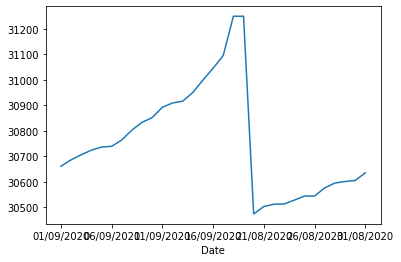

In [17]:
covidInfo[(covidInfo.Pays=="France")].groupby("Date").Deces.sum().plot()

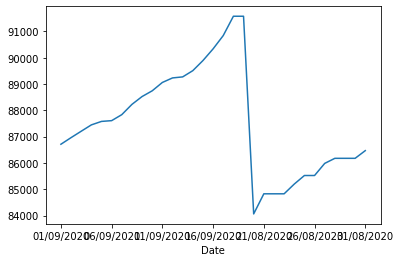

In [18]:
covidInfo[(covidInfo.Pays=="France")].groupby("Date").Guerisons.sum().plot()

In [19]:
total_deces=covidInfo.pivot_table('Deces',index='Pays',columns='Date',aggfunc=sum)
total_deces

Date,01/09/2020,02/09/2020,03/09/2020,04/09/2020,05/09/2020,06/09/2020,07/09/2020,08/09/2020,09/09/2020,10/09/2020,...,22/08/2020,23/08/2020,24/08/2020,25/08/2020,26/08/2020,27/08/2020,28/08/2020,29/08/2020,30/08/2020,31/08/2020
Pays,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1406,1409,1409,1409,1409,1412,1415,1418,1420,1420,...,1385,1387,1389,1397,1401,1401,1402,1402,1402,1402
Afrique du Sud,14263,14389,14563,14678,14779,14889,15004,15086,15168,15265,...,12987,13059,13159,13308,13502,13628,13743,13981,14028,14149
Albanie,290,296,301,306,312,316,319,321,322,324,...,245,250,254,259,263,266,271,275,280,284
Algérie,1518,1523,1529,1539,1549,1556,1562,1571,1581,1591,...,1424,1435,1446,1456,1465,1475,1483,1491,1501,1510
Allemagne,9307,9322,9322,9327,9329,9330,9331,9336,9342,9345,...,9272,9275,9276,9281,9285,9290,9290,9299,9300,9303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Équateur,6571,6619,6648,6674,6724,6724,10576,10627,10701,10749,...,6277,6310,6322,6368,6410,6471,6504,6537,6555,6556
Érythrée,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
États-Unis,184664,185720,186790,187755,188538,188941,189208,189653,190859,191766,...,176353,176802,177252,178486,179708,180824,181800,182761,183066,183597


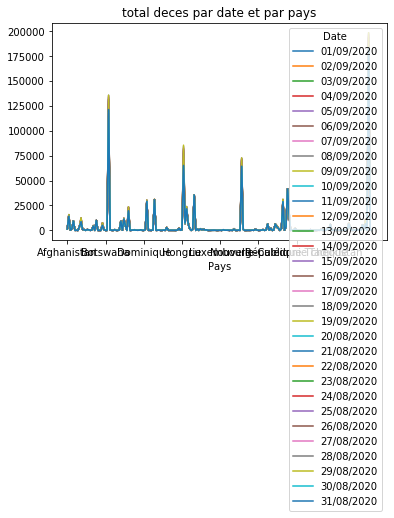

In [23]:
total_deces.plot(title="total deces par date et par pays")